# Part1 - Exploratory Data Analysis of Thera Bank Loan Modelling

## Objective:
   ### To explore and analyse the data provided by following method:
1. Understand the predictors and the target variable.
2. Clean the data.
3. Understand the distribution of different variables in the data set to derive insights into pre-processing it before applying to any ML model.
4. Understand the relationship between independent variables/predictors ans also the target vartiable using bith visualisation and statistical methods.
5. Identify predictors that have higher correlation with another one. This would call for dropping one such columns to reduce the overall bias in the data.
  

### (1) Importing Python libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
import ipywidgets as widgets
import itertools
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
import re


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
pd.set_option('display.max_colwidth', 500)

### (2) Reading the CSV File

In [2]:

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### (3) Describe the features in the data column

In [3]:
df.shape

(5000, 14)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations: 
1. Almost all columns have integer datatype except for CCAvg which is float.
2. None of the categorical variables have object data type.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# Describe continuous variable against the target variables 'Personal Loan'
columns_to_show = [ 'Income','CCAvg','Mortgage','Family','Age','Experience']
df.groupby(['Personal Loan'])[columns_to_show].agg([np.mean,min,max,np.std]).T

Personal Loan             0           1
Income     mean   66.237389  144.745833
           min     8.000000   60.000000
           max   224.000000  203.000000
           std    40.578534   31.584429
CCAvg      mean    1.729009    3.905354
           min     0.000000    0.000000
           max     8.800000   10.000000
           std     1.567647    2.097681
Mortgage   mean   51.789381  100.845833
           min     0.000000    0.000000
           max   635.000000  617.000000
           std    92.038931  160.847862
Family     mean    2.373451    2.612500
           min     1.000000    1.000000
           max     4.000000    4.000000
           std     1.148771    1.115393
Age        mean   45.367257   45.066667
           min    23.000000   26.000000
           max    67.000000   65.000000
           std    11.450427   11.590964
Experience mean   20.132301   19.843750
           min    -3.000000    0.000000
           max    43.000000   41.000000
           std    11.456672   11.582443

### (4) Find out  NANs,Zeros, Negatives numbers in the data set

In [7]:
pd.DataFrame(data={'NANs':list(df.isna().sum()),
              'Zeros':[df[df[i] == 0 ][i].count() for i in df.columns],
             'Negatives':[df[df[j] < 0 ][j].count() for j in df.columns]},
             index=df.columns)



,NANs,Zeros,Negatives
ID,0,0,0
Age,0,0,0
Experience,0,66,52
Income,0,0,0
ZIP Code,0,0,0
Family,0,0,0
CCAvg,0,106,0
Education,0,0,0
Mortgage,0,3462,0
Personal Loan,0,4520,0


#### Observations :
1. There are no **NaNs** in the dataset.
2. There are a few columns with '0' values and seems to be valid values as many of them are binary class categorical variable and continuous variables as well.
3. Column **Experience** has -ve values and since experience is a function of time it cannot have -ve values. We will replace this -ve value with a mean value.

### (5) Set ID as the index of the data frame

In [8]:
df.set_index("ID",inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### (6) Create a dataframe to hold the types of all variables along with their unique values

In [9]:
## Function to create the list of continuous and categorical variables.
def create_variable_list(df,min_cats,stats=False):
    '''
    Function for categoring the continuous and categorical columns 
    Usage: 
        create_variable_list(df,min_cats,stats):
        (1) df : Pandas data frame.
        (2) min_cats : Threshold for a variables to be deemed as a Categorical Variable
        (3) stats :( dafult=False) Return a table of variable name, variable type, number of unique values and list of unique values.
                    
        Return : Returns two lists each with categorical and continuous variables respectively.
                 Also if stats=True, then return a table of data types
        
    '''
    categorical =[]
    continuous= []
    for col in df.columns:
        if df[col].nunique() > min_cats :
            continuous.append(col)
        else:
            categorical.append(col)
    if stats == True :

        var_df = pd.DataFrame(columns=['Variable',
                                       'Type',
                                       'Categorical_Class',
                                       'Uniques',
                                       'N-Uniques'])
        
        for cats in categorical:
            if df[cats].nunique() == 2 :
                cat_class = 'Binary'
            else:
                cat_class = 'Multi'
            var_df = var_df.append({'Variable' : cats,
                                    'Type' :'Categorical',
                                    'Categorical_Class':cat_class,
                                    'Uniques': df[cats].unique(),
                                    'N-Uniques': len(df[cats].unique())},
                                   ignore_index=True)
        for conts in continuous:
            var_df = var_df.append({'Variable' : conts,
                                    'Type' :'Continuous',
                                    #'Uniques': df[conts].unique(),
                                    'N-Uniques': len(df[conts].unique())},
                                   ignore_index=True)
        return categorical,continuous,var_df
    else:
        return categorical,continuous

In [10]:
_,_,cats_df1= create_variable_list(df,10,stats=True)
cats_df1

,Variable,Type,Categorical_Class,Uniques,N-Uniques
0,Family,Categorical,Multi,"[4, 3, 1, 2]",4
1,Education,Categorical,Multi,"[1, 2, 3]",3
2,Personal Loan,Categorical,Binary,"[0, 1]",2
3,Securities Account,Categorical,Binary,"[1, 0]",2
4,CD Account,Categorical,Binary,"[0, 1]",2
5,Online,Categorical,Binary,"[0, 1]",2
6,CreditCard,Categorical,Binary,"[0, 1]",2
7,Age,Continuous,NaN,NaN,45
8,Experience,Continuous,NaN,NaN,47
9,Income,Continuous,NaN,NaN,162


#### Observations :
1. The above data frame lists differnt variables with their types and classes. 
2. For all practical purposes,we have broadly categorised variables into **categorical** and **continuous**. Also, we have further classified categorical variables into *binary class (0,1)* and *multiclass (1,2,3,4)*.
3. As an exception 'ZIP Code' is categorised as **continuos variable** due to the very numbering format. Infact it would deem suitable to have this as a categorical variable. We will extract the first two digits of the ZIP code (broader geographical location) and convert them into a categorical variable.

### (7) Data Cleansing

#### (1) ZIP Code - Convert 5 digit ZIP Code to 2 digit 

In [11]:

df['ZIP Code'] = df['ZIP Code'].apply(lambda x : int(x/100) if len(str(x)) < 5 else int(x/1000))
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


#### (2) Experience - Replace -ve values with mean.

In [12]:
exp_corr_mean = round(df[df['Experience'] > 0]['Experience'].mean())
df['Experience']=df['Experience'].apply(lambda x : exp_corr_mean if(x < 0) else x )
df[df['Experience'] <0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,


In [13]:
# Re-running the fucntion create_variable_list to verify the variables type and class. 
#Also to create the list of categorical and continuous variables.
cat_var_list,cont_var_list,cats_df1= create_variable_list(df,10,stats=True)
cats_df1

,Variable,Type,Categorical_Class,Uniques,N-Uniques
0,ZIP Code,Categorical,Multi,"[91, 90, 94, 92, 93, 95, 96]",7
1,Family,Categorical,Multi,"[4, 3, 1, 2]",4
2,Education,Categorical,Multi,"[1, 2, 3]",3
3,Personal Loan,Categorical,Binary,"[0, 1]",2
4,Securities Account,Categorical,Binary,"[1, 0]",2
5,CD Account,Categorical,Binary,"[0, 1]",2
6,Online,Categorical,Binary,"[0, 1]",2
7,CreditCard,Categorical,Binary,"[0, 1]",2
8,Age,Continuous,NaN,NaN,45
9,Experience,Continuous,NaN,NaN,44


In [14]:
# Remove the column name 'ID' from the list holding continuous variables.
try:
    cont_var_list.remove('ID')
    print("variable ID removed from the list")
except:
    pass
cont_var_list

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

### (8) Correlations and their statistical significance

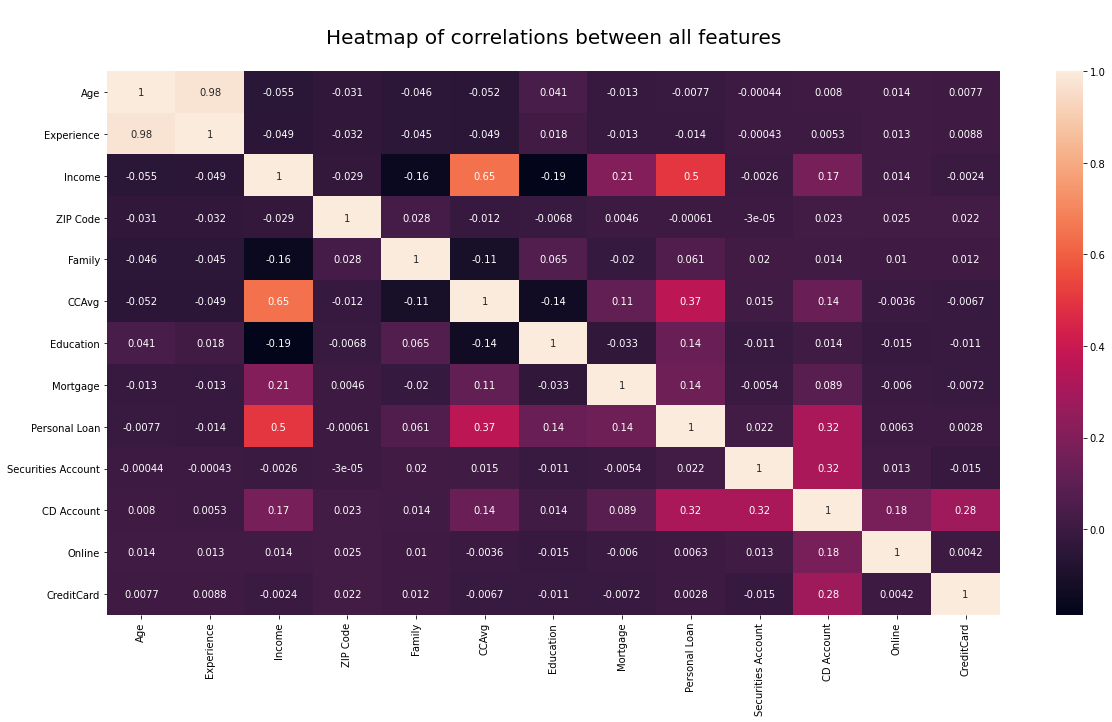

In [15]:
# Heatmap of of all variables.
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True);
plt.title("\nHeatmap of correlations between all features\n",{'fontsize':20});

#### Observations:
1. From the heat map, Age and Experience are highly correlated. Hence,we will remove one of the features while modelling. 
2. CCAvg,Mortgage,Personal Loan,CD Account,Family,Education and Securities Account show positive correlation. 
3. We will need to evalaute the following.
* Do these features exhibit correlation with the target variable "Personal Loan"?
* Are these correlation statistically significant at $\alpha$=0.05 ?

#### (a) Do these features exhibit correlation with the target variable "Personal Loan"?

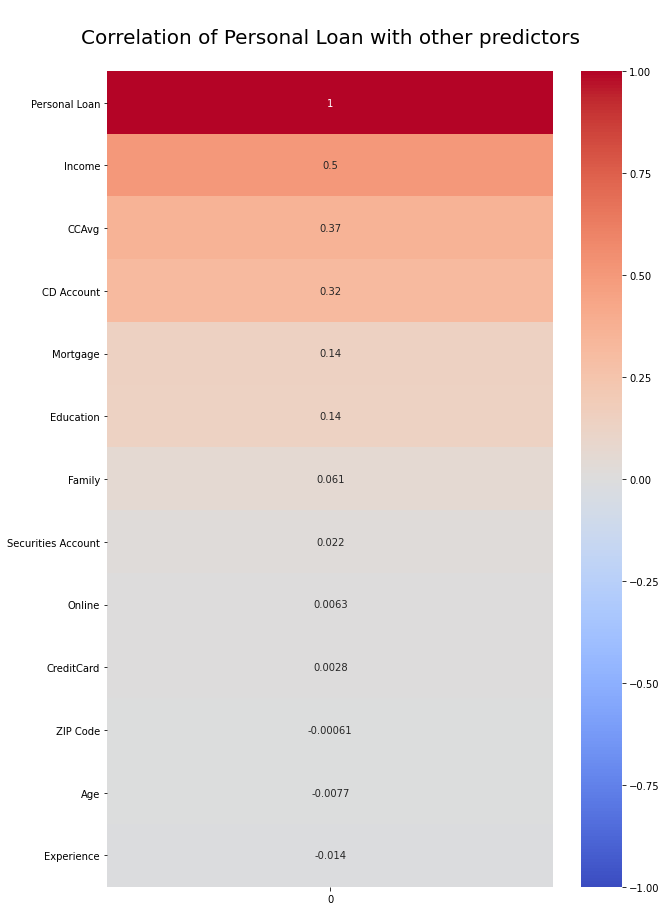

In [16]:
correlations = df.corrwith(df['Personal Loan'],method='pearson').to_frame()
sorted_correlations = correlations.sort_values(0,ascending=False)
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);
plt.title("\nCorrelation of Personal Loan with other predictors\n",fontsize=20);

#### Observations:
1. There seems to be some +ve correlation between Personal Loan and CCAvg/Mortgage/CD Account/Family/Education/Securities Account 

#### (b) Are these correlation statistically significant at $\alpha$=0.05 ?

In [17]:
#Statistical Significance of correlation of predictirs with independent variable i.e 'Personal Loan'
from scipy import stats
alpha = 0.05
print("Statistical significance of correlation between predictors and Personal Loan\n=========================================================")
print(f"Level of Significance(alpha) :{alpha}\n")
cols_to_drop = ['ZIP Code','Personal Loan','ID']
for drops in cols_to_drop:
    try:
        columns_to_test = list(df.drop([drops],axis=1).columns)
    except:
        pass
# print(columns_to_test)
p_col,coef_col,feature=[],[],[]
for cols in columns_to_test:
    pearson_coef, p_value=stats.pearsonr(df[cols], df['Personal Loan'])
    if p_value < alpha :
        feature.append(cols)
        p_col.append(p_value)
        coef_col.append(pearson_coef)

pearson_corr_df = pd.DataFrame({'Features':feature,
                  'Pearson_Coefficients':coef_col,
                  'P_Value':p_col}).sort_values(by='Pearson_Coefficients',ascending=False)
pearson_corr_df.set_index('Features',inplace=True)
pearson_corr_df
        

Statistical significance of correlation between predictors and Personal Loan
Level of Significance(alpha) :0.05



,Pearson_Coefficients,P_Value
Features,,
Income,0.502462,3.560286e-318
CCAvg,0.366889,3.830266e-159
CD Account,0.316355,1.278403e-116
Mortgage,0.142095,5.730342e-24
Education,0.136722,2.709663e-22
Family,0.061367,1.409904e-05


#### Observations:
1. The above features exhibit statistically significant correlation with the target variable Personal Loan 

### (9) Visualise Linear Relationships

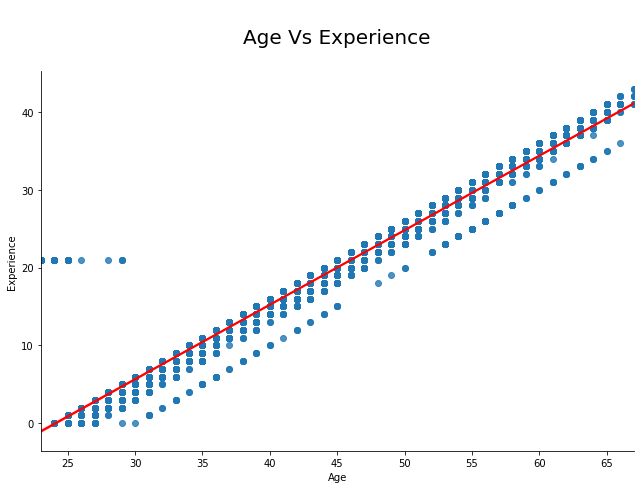

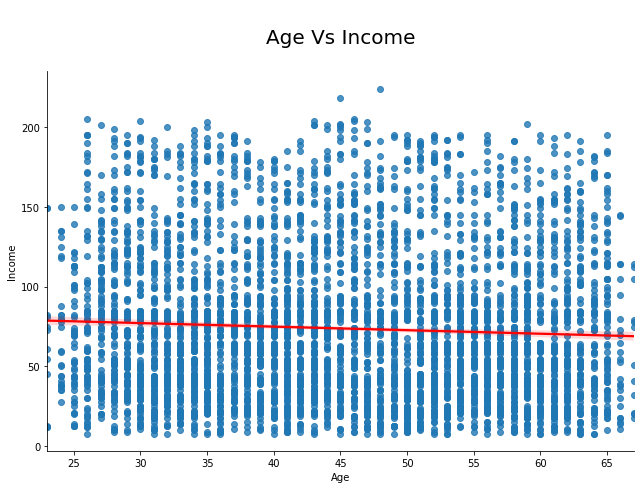

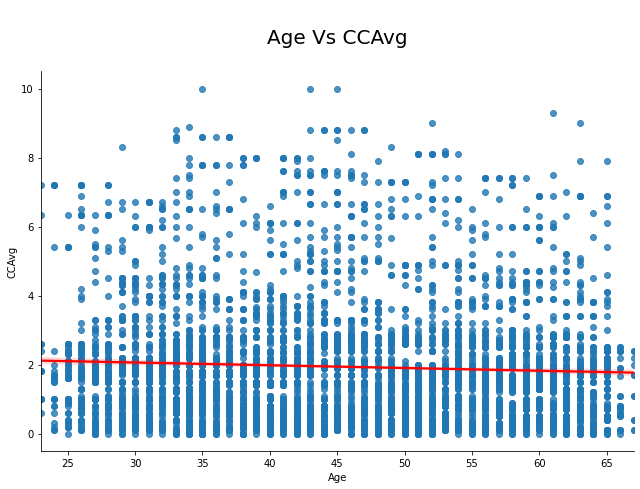

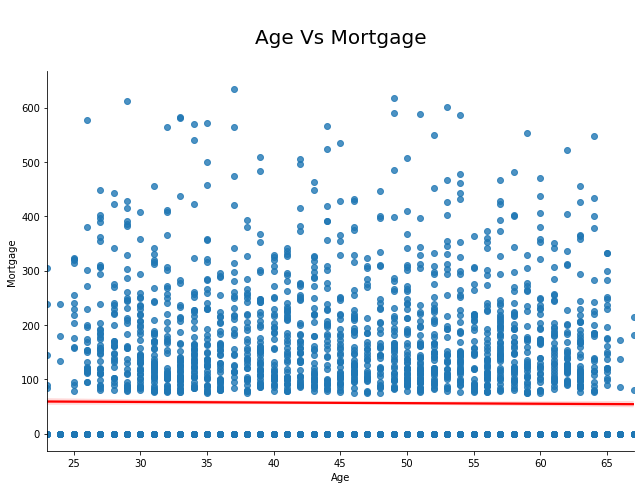

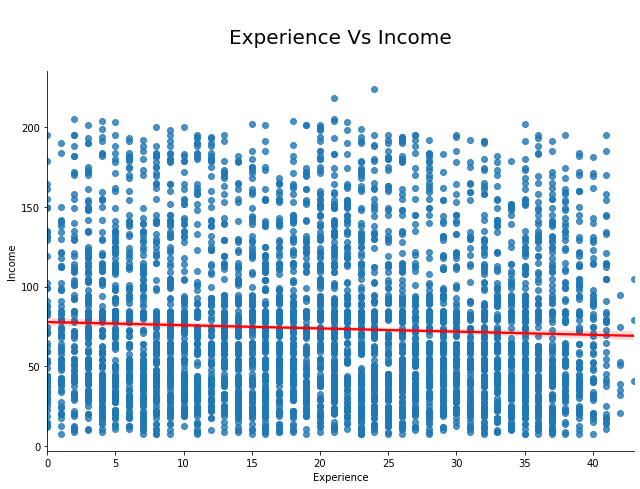

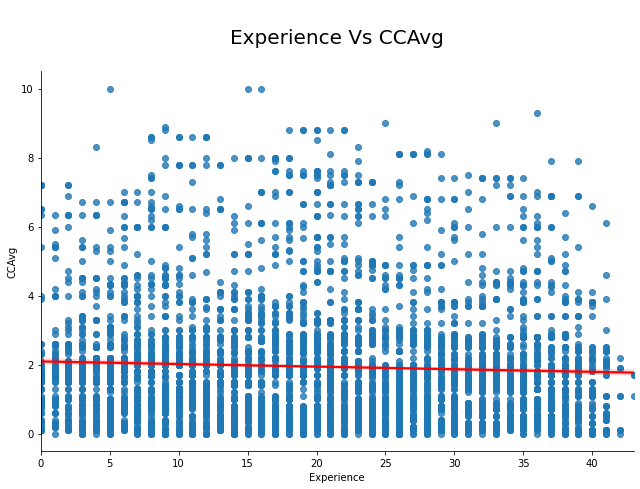

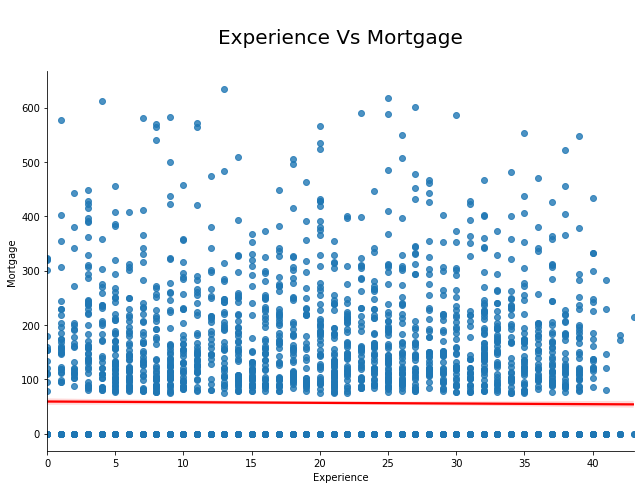

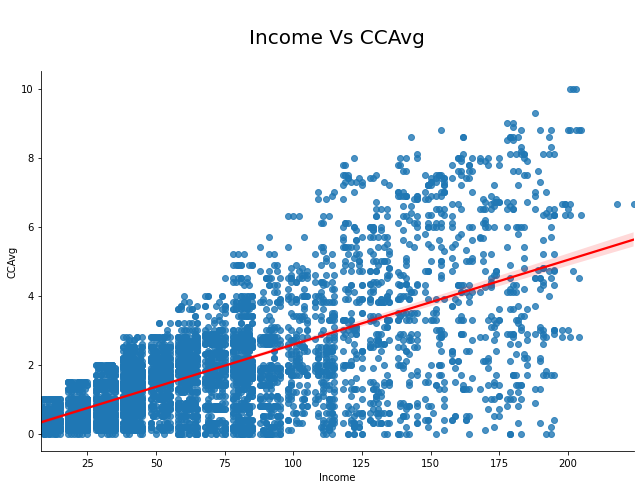

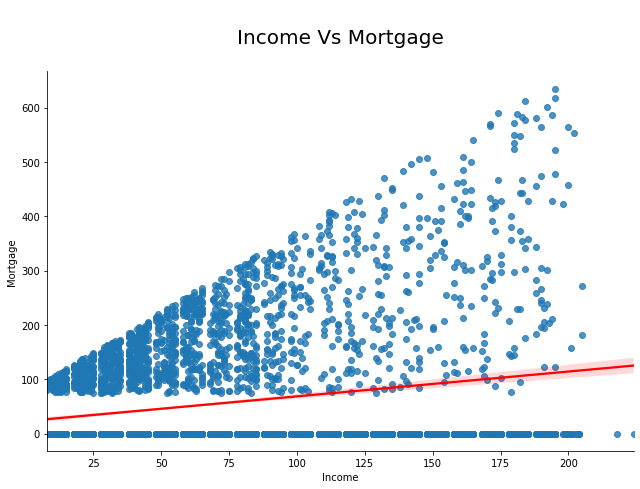

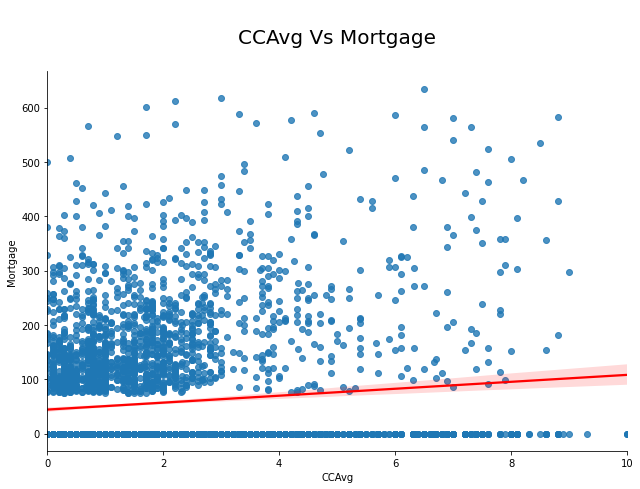

In [18]:
# sns.set(font_scale=1.2)
for lin_rels in [ items for items in itertools.combinations(cont_var_list,2)]:
    sns.lmplot(lin_rels[0], 
               lin_rels[1], 
               data=df, 
#                hue='Personal Loan',
              fit_reg=1,
              height=6,
              aspect=1.5,
              line_kws={'color': 'red'});
    plt.title(f"\n{lin_rels[0]} Vs {lin_rels[1]}\n",fontdict=dict(fontsize=20))
    plt.show()

#### Observations:
1. Age and Experience : Shows **strong linear relationship and a +ve slope** i.e they are collinear. This means that a chnage in Age or Experience explains the change in the other. Therefore, it would make sense to retain just the one i.e either Age or Experience.
2. Age and Income :  Does not show a strong liner relationship and a slightly -ve slope.
3. Age and CCAvg : Does not show a strong liner relationship and a slightly -ve slope.
4. Age and Mortgage : Does not show a strong liner relationship and nearly zero slope.
5. Experience and Income : Does not show a strong liner relationship and a slightly -ve slope.
6. Experience and CCAvg : Does not show a strong liner relationship and a slightly -ve slope.
7. Experience and Mortgage : Does not show a strong liner relationship and nearly zero slope.
8. Income and CCAvg : Shows **strong linear relationship and a +ve slope**.
9. Income and Mortgage : Shows **significant linear relationship and a +ve slope**.
10. CCAvg and Mortgage : Shows **significant linear relationship and a +ve slope**.

### (10) Visulaizing distribution of Continuous and Categorical varaibles

#### (1) Histograms of continuous variables and Normality test

#### Creating ranges of numeric variables by binning them.


In [19]:
age_bins = round((df['Age'].max()-df['Age'].min())/5)
exp_corr_mean = round(df[df['Experience'] > 0]['Experience'].mean())
exp_bins = round((df['Experience'].max()-df['Experience'].min())/5)
income_bins = round((df['Income'].max()-df['Income'].min())/50)
mortgage_bins = round((df['Mortgage'].max()-df['Mortgage'].min())/150)


In [20]:
df['CCAvg-Bin'] = pd.cut(df['CCAvg'],bins=10,right=False,precision=0)
df['Age-Bin'] = pd.cut(df['Age'],bins=age_bins+1,include_lowest=True,precision=0)
df['Experience-Bin'] = pd.cut(df['Experience'],bins=exp_bins,precision=0,include_lowest=True,right=False)#,labels=[1,2,3,4,5,6,7,8,9,10])
df['Income-Bin'] = pd.cut(df['Income'],bins=income_bins,precision=0,include_lowest=True)#,labels=[1,2,3,4,5,6,7,8,9,10])
df['Mortgage-Bin'] = pd.cut(df['Mortgage'],bins=mortgage_bins,precision=0,include_lowest=True)#,labels=[1,2,3,4,5,6,7,8,9,10])

df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg-Bin,Age-Bin,Experience-Bin,Income-Bin,Mortgage-Bin
ID,,,,,,,,,,,,,,,,,,
1,25,1,49,91,4,1.6,1,0,0,1,0,0,0,"[1.0, 2.0)","(22.0, 27.0]","[0.0, 5.0)","(7.0, 62.0]","(-2.0, 159.0]"
2,45,19,34,90,3,1.5,1,0,0,1,0,0,0,"[1.0, 2.0)","(41.0, 45.0]","[14.0, 19.0)","(7.0, 62.0]","(-2.0, 159.0]"
3,39,15,11,94,1,1.0,1,0,0,0,0,0,0,"[1.0, 2.0)","(36.0, 41.0]","[14.0, 19.0)","(7.0, 62.0]","(-2.0, 159.0]"
4,35,9,100,94,1,2.7,2,0,0,0,0,0,0,"[2.0, 3.0)","(32.0, 36.0]","[5.0, 10.0)","(62.0, 116.0]","(-2.0, 159.0]"
5,35,8,45,91,4,1.0,2,0,0,0,0,0,1,"[1.0, 2.0)","(32.0, 36.0]","[5.0, 10.0)","(7.0, 62.0]","(-2.0, 159.0]"


In [21]:
#re-running the categorisation function
cat_var_list,cont_var_list,cats_df1= create_variable_list(df,10,stats=True)
cats_df1

,Variable,Type,Categorical_Class,Uniques,N-Uniques
0,ZIP Code,Categorical,Multi,"[91, 90, 94, 92, 93, 95, 96]",7
1,Family,Categorical,Multi,"[4, 3, 1, 2]",4
2,Education,Categorical,Multi,"[1, 2, 3]",3
3,Personal Loan,Categorical,Binary,"[0, 1]",2
4,Securities Account,Categorical,Binary,"[1, 0]",2
5,CD Account,Categorical,Binary,"[0, 1]",2
6,Online,Categorical,Binary,"[0, 1]",2
7,CreditCard,Categorical,Binary,"[0, 1]",2
8,CCAvg-Bin,Categorical,Multi,"[[1.0, 2.0), [2.0, 3.0), [0.0, 1.0), [8.0, 9.0), [3.0, 4.0), [4.0, 5.0), [5.0, 6.0), [7.0, 8.0), [6.0, 7.0), [9.0, 10.0)] Categories (10, interval[float64]): [[0.0, 1.0) < [1.0, 2.0) < [2.0, 3.0) < [3.0, 4.0) ... [6.0, 7.0) < [7.0, 8.0) < [8.0, 9.0) < [9.0, 10.0)]",10
9,Age-Bin,Categorical,Multi,"[(22.0, 27.0], (41.0, 45.0], (36.0, 41.0], (32.0, 36.0], (49.0, 54.0], (63.0, 67.0], (27.0, 32.0], (45.0, 49.0], (58.0, 63.0], (54.0, 58.0]] Categories (10, interval[float64]): [(22.0, 27.0] < (27.0, 32.0] < (32.0, 36.0] < (36.0, 41.0] ... (49.0, 54.0] < (54.0, 58.0] < (58.0, 63.0] < (63.0, 67.0]]",10


In [22]:
def get_Normality_Check(df):
    '''
    This function uses Shpiro-Wilk method to test Normality at an alpha of 0.05.
    Ho: The sample  data is Normally distributed.
    H1: The sample data is not Normally distributed.
    Usage:
        1) df : Data Frame with all features who's normality needs to be tested.
    Returns:
        1) DataFrame with Features, Normality (yes/No) and corresponding P_value as columns.
    '''
    alpha = 0.05
    normal,p_value,cols=[],[],[]
    for i in df.columns:
        if (df[i].dtype.name == 'int64' or df[i].dtype.name == 'float64'):
            data = df[i]
            if shapiro(data)[1] > alpha :
                normal.append('Yes')
            else:
                normal.append('No')
            p_value.append(round(shapiro(data)[1],8))
            cols.append(i)
        else:
            pass
    normality_df = pd.DataFrame({'Features':cols,'Normality':normal,'P-Value':p_value})
    normality_df.set_index('Features',inplace=True)
    return(normality_df)


#Testing Only
#=============
# get_Normality_Check(df)

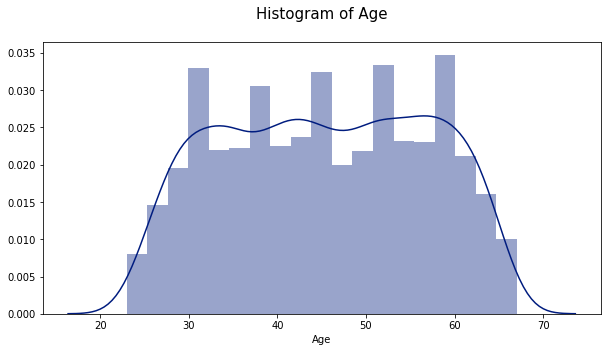

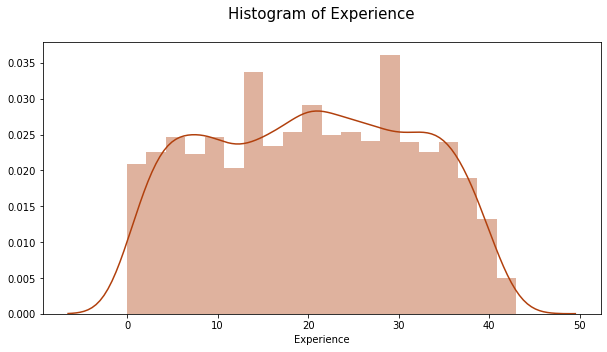

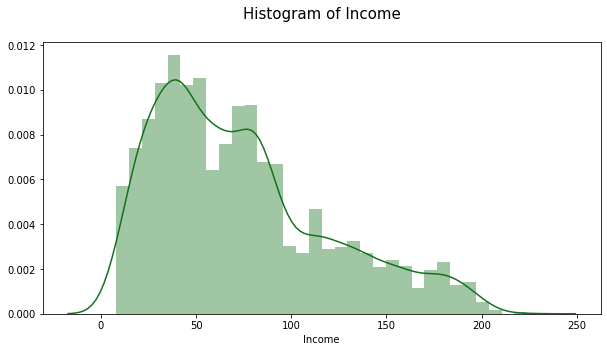

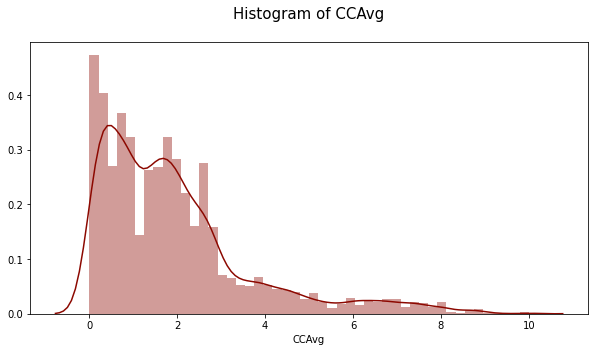

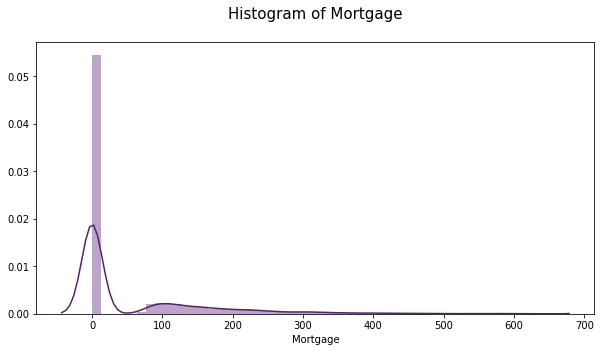

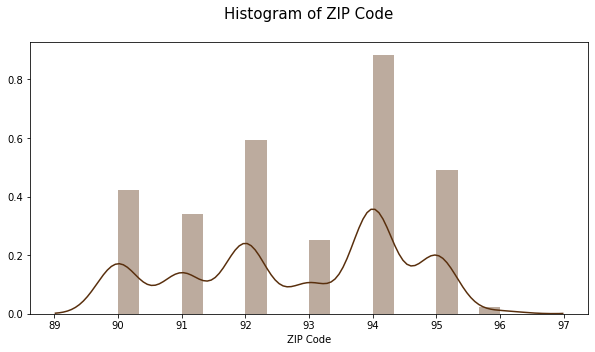

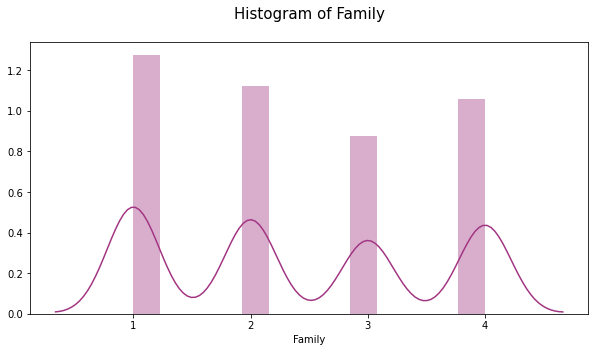

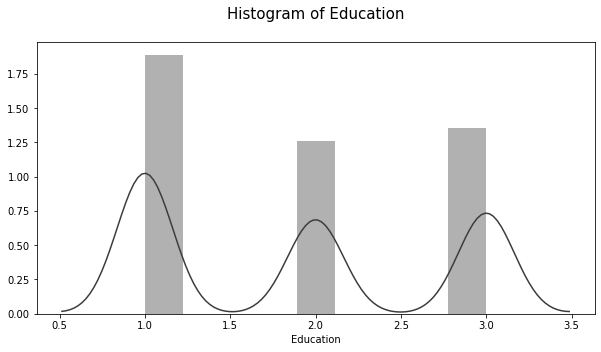

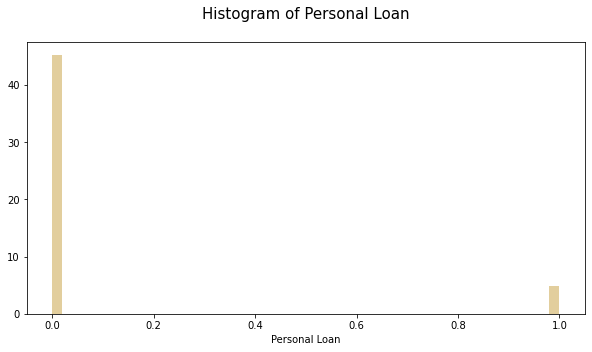

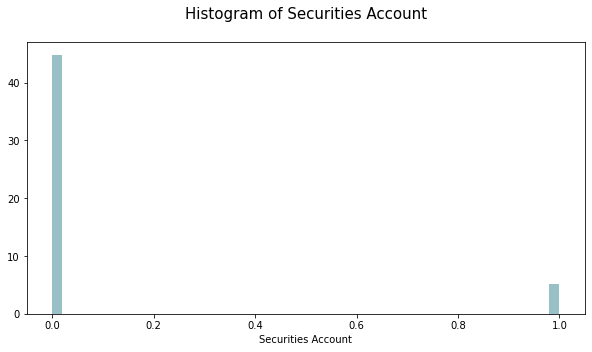

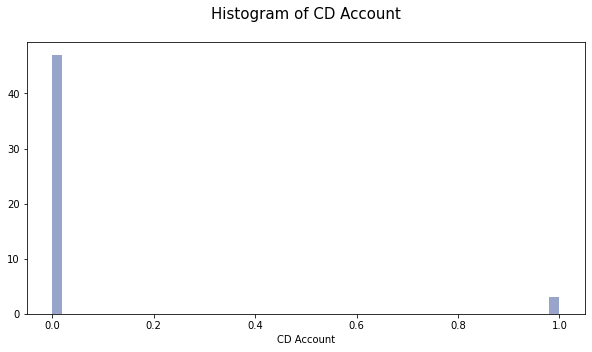

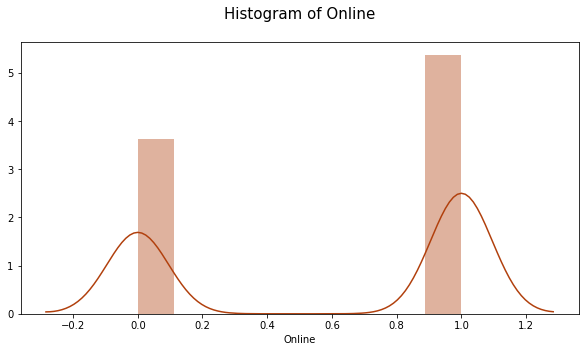

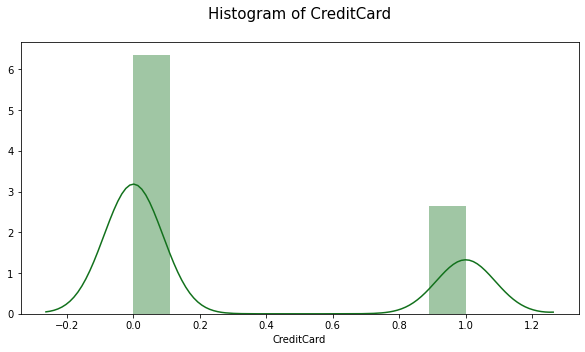


 Histogram is unavailable for categorical variable 'CCAvg-Bin'

 Histogram is unavailable for categorical variable 'Age-Bin'

 Histogram is unavailable for categorical variable 'Experience-Bin'

 Histogram is unavailable for categorical variable 'Income-Bin'

 Histogram is unavailable for categorical variable 'Mortgage-Bin'


In [23]:
sncp_c1 = sns.color_palette("dark", 20)
for color,cont_vars in enumerate(cont_var_list+cat_var_list):
    if (df[cont_vars].dtype.name == 'int64' or df[cont_vars].dtype.name == 'float64'): 
        fig,ax = plt.subplots(figsize=(10,5))
        sns.distplot(df[cont_vars],kde=True,color=sncp_c1[color]);
        plt.title(f'Histogram of {cont_vars}\n',{'fontsize':15})
        plt.show()
    else:
        print(f"\n Histogram is unavailable for categorical variable '{cont_vars}'")
        pass

#### Observations:
1. Age and Experience seems to uniformly distributed.
2. CCAvg and Income are left skewed.
3. Mortgage is heavily left skewed.
4. ZIP Code, Education, Family, CD Account, Personal Loan, Securities Account, CreditCard and Online ate multi-modal distributions.
5. None of the above columns have a normal distribution of data. We will verify this statistically.


In [24]:
print("\nBin'd data are not displayed in this chart\n")
get_Normality_Check(df)


Bin'd data are not displayed in this chart



,Normality,P-Value
Features,,
Age,No,0.0
Experience,No,0.0
Income,No,0.0
ZIP Code,No,0.0
Family,No,0.0
CCAvg,No,0.0
Education,No,0.0
Mortgage,No,0.0
Personal Loan,No,0.0


#### Observation: 
1. It's statistically proved that none of the features have their data normally distributed.
2. Shapiro-Wilk test used at a significance level of 0.05

#### (2) Barplots for categorical variables 

In [25]:
# Remove the variable 'Personal Loan' from the list holding categorical variable.
cat_var_list.remove('Personal Loan')
cat_var_list

['ZIP Code',
 'Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'CCAvg-Bin',
 'Age-Bin',
 'Experience-Bin',
 'Income-Bin',
 'Mortgage-Bin']

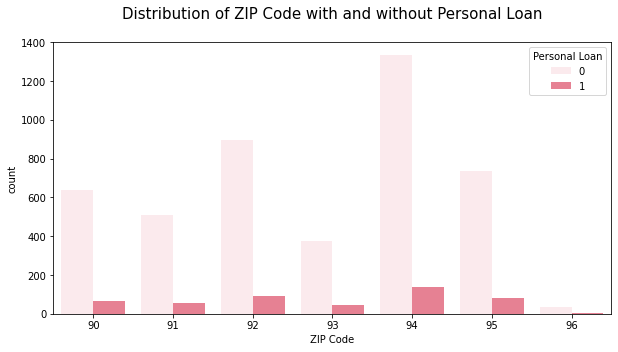

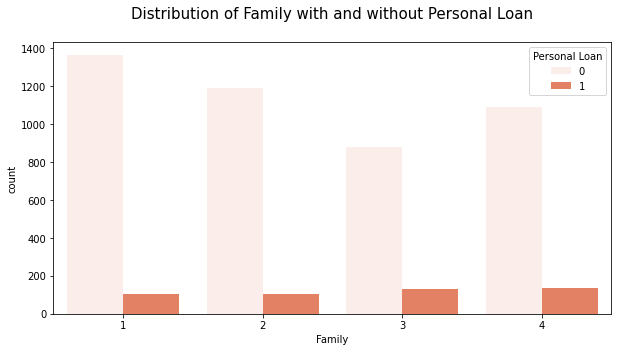

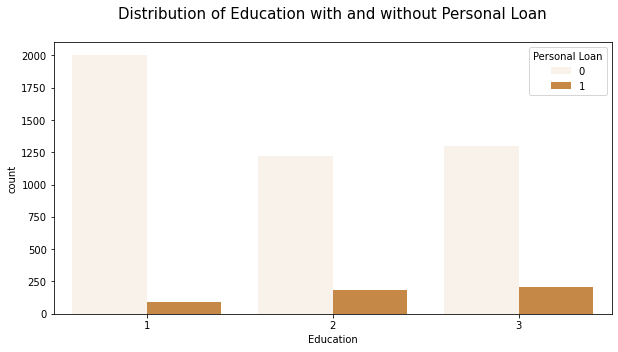

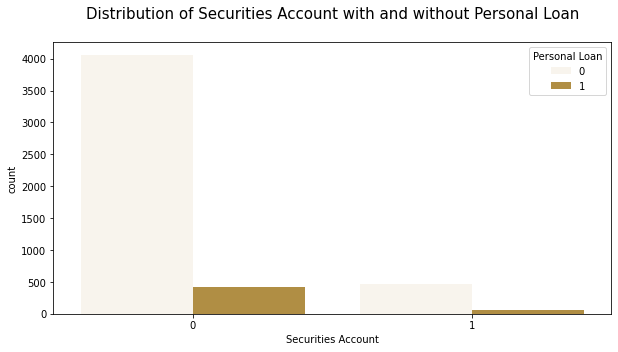

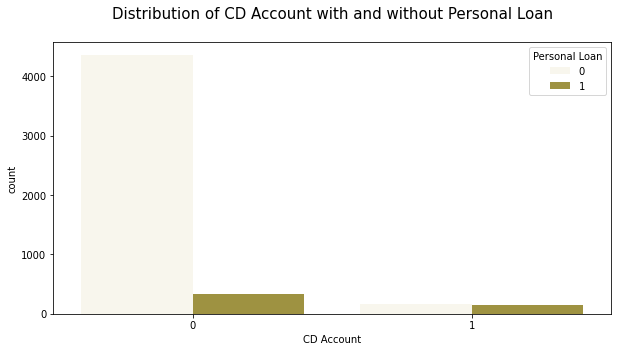

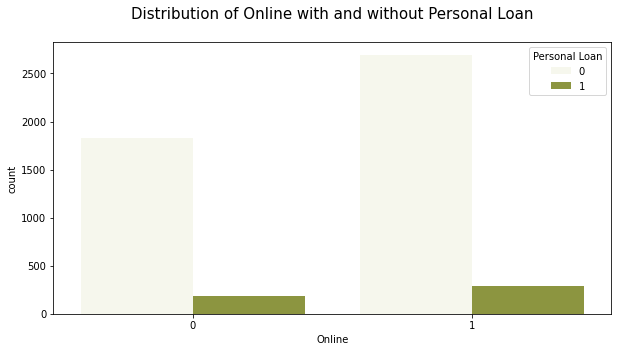

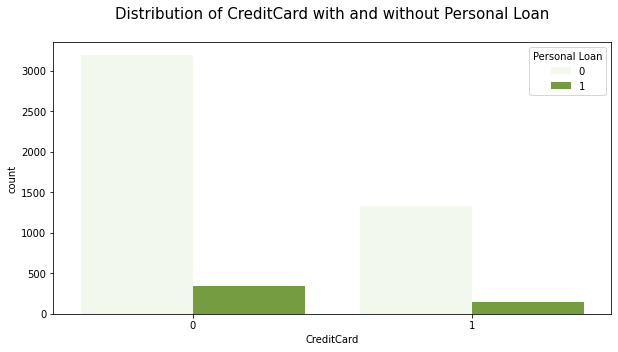

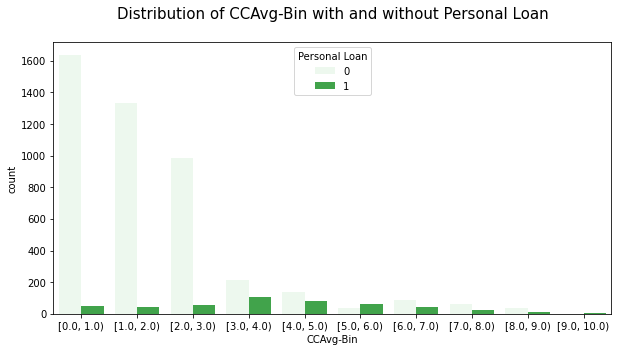

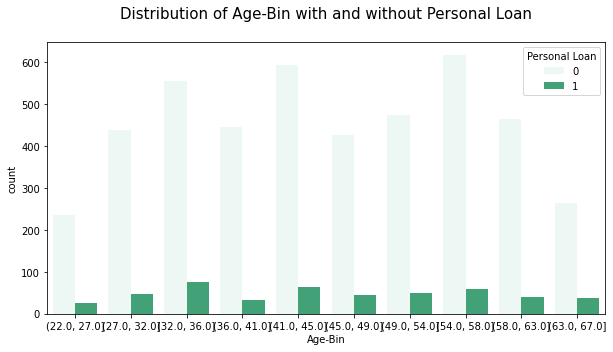

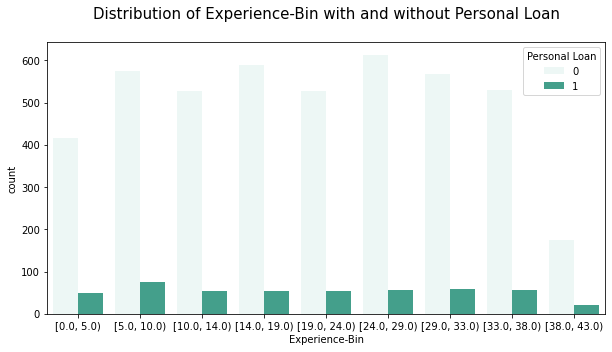

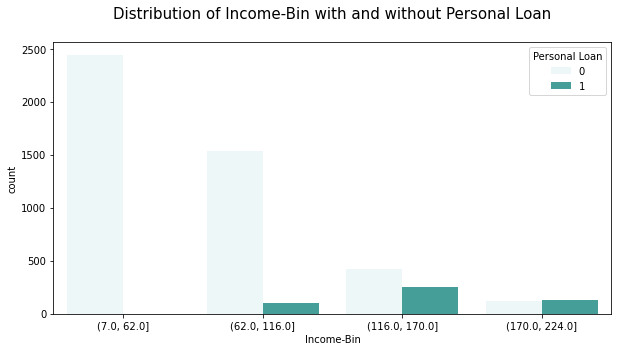

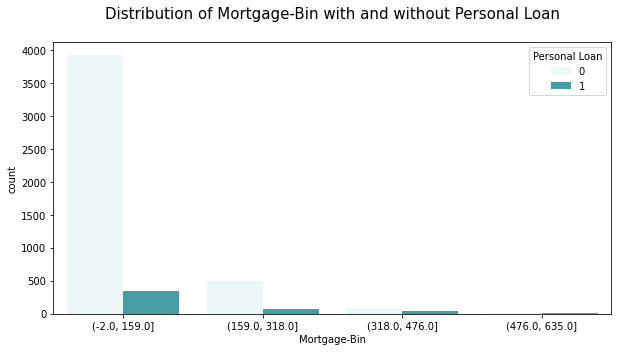

In [26]:
sncp_c2 = sns.color_palette("husl", 20)
for color,cat_vars in enumerate(cat_var_list):
    fig,ax = plt.subplots(figsize=(10,5))
    sns.countplot(df[cat_vars],hue=df['Personal Loan'],color=sncp_c2[color]);
    plt.title(f'Distribution of {cat_vars} with and without Personal Loan\n',{'fontsize':15})
    plt.show()

#### Observations:
1. By large, people from ZIP Code 94 have opted for the personal loan when compared to other cities.
2. By large, people with family size of 4 have opted for the personal loan when comapred to other's with smaller family size.
3. By large, people with higher education background(3) have opted for the perosnal loan when compared to lower education categories.
4. By large, people without securities account have opted for the personal loan.
5. By large, people without cetificate of deposit have opted for the personal loan.
6. By large, people with online access to their account have opted for the personal loan.
7. By large, people without credit card with Thera Bank have opted for the personal loan.
8. By large, people with 3-4 credit cards have opted for the personal loan.
9. By large, people in the age group of 32-36 years have opted for the personal loan.
10. By large, people in the experience of 5-10 years have opted for the personal loan.
11. By large, people in the income group of 116-170 USD have opted for the personal loan.
12. By large, people with a mortgage upto 159 USD have opted for the personal loan.


### (11) Visualize proportions for categorical variables

In [27]:
try:
    cats_df1.set_index('Variable',inplace=True)
except:
    pass
cats_df1

,Type,Categorical_Class,Uniques,N-Uniques
Variable,,,,
ZIP Code,Categorical,Multi,"[91, 90, 94, 92, 93, 95, 96]",7
Family,Categorical,Multi,"[4, 3, 1, 2]",4
Education,Categorical,Multi,"[1, 2, 3]",3
Personal Loan,Categorical,Binary,"[0, 1]",2
Securities Account,Categorical,Binary,"[1, 0]",2
CD Account,Categorical,Binary,"[0, 1]",2
Online,Categorical,Binary,"[0, 1]",2
CreditCard,Categorical,Binary,"[0, 1]",2
CCAvg-Bin,Categorical,Multi,"[[1.0, 2.0), [2.0, 3.0), [0.0, 1.0), [8.0, 9.0), [3.0, 4.0), [4.0, 5.0), [5.0, 6.0), [7.0, 8.0), [6.0, 7.0), [9.0, 10.0)] Categories (10, interval[float64]): [[0.0, 1.0) < [1.0, 2.0) < [2.0, 3.0) < [3.0, 4.0) ... [6.0, 7.0) < [7.0, 8.0) < [8.0, 9.0) < [9.0, 10.0)]",10


In [28]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg-Bin,Age-Bin,Experience-Bin,Income-Bin,Mortgage-Bin
ID,,,,,,,,,,,,,,,,,,
1,25,1,49,91,4,1.6,1,0,0,1,0,0,0,"[1.0, 2.0)","(22.0, 27.0]","[0.0, 5.0)","(7.0, 62.0]","(-2.0, 159.0]"
2,45,19,34,90,3,1.5,1,0,0,1,0,0,0,"[1.0, 2.0)","(41.0, 45.0]","[14.0, 19.0)","(7.0, 62.0]","(-2.0, 159.0]"
3,39,15,11,94,1,1.0,1,0,0,0,0,0,0,"[1.0, 2.0)","(36.0, 41.0]","[14.0, 19.0)","(7.0, 62.0]","(-2.0, 159.0]"
4,35,9,100,94,1,2.7,2,0,0,0,0,0,0,"[2.0, 3.0)","(32.0, 36.0]","[5.0, 10.0)","(62.0, 116.0]","(-2.0, 159.0]"
5,35,8,45,91,4,1.0,2,0,0,0,0,0,1,"[1.0, 2.0)","(32.0, 36.0]","[5.0, 10.0)","(7.0, 62.0]","(-2.0, 159.0]"


In [29]:
try:
    cat_var_list.remove('Personal Loan')
except:
    pass
cat_var_list

['ZIP Code',
 'Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'CCAvg-Bin',
 'Age-Bin',
 'Experience-Bin',
 'Income-Bin',
 'Mortgage-Bin']

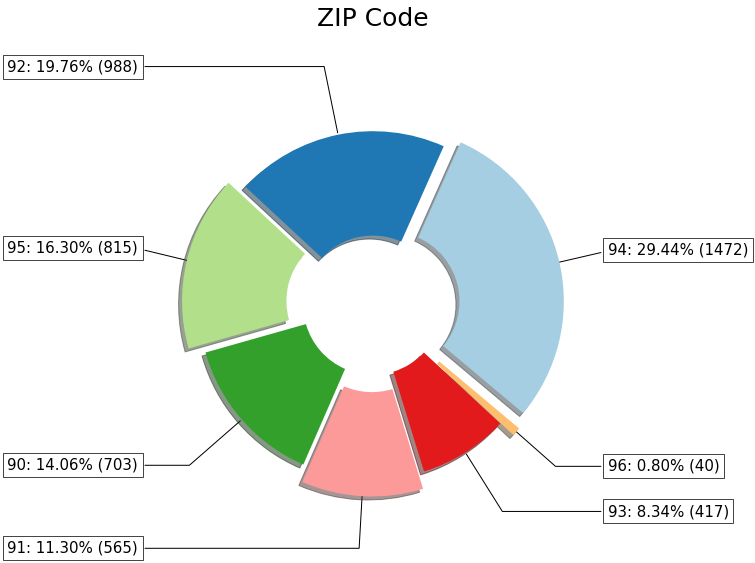

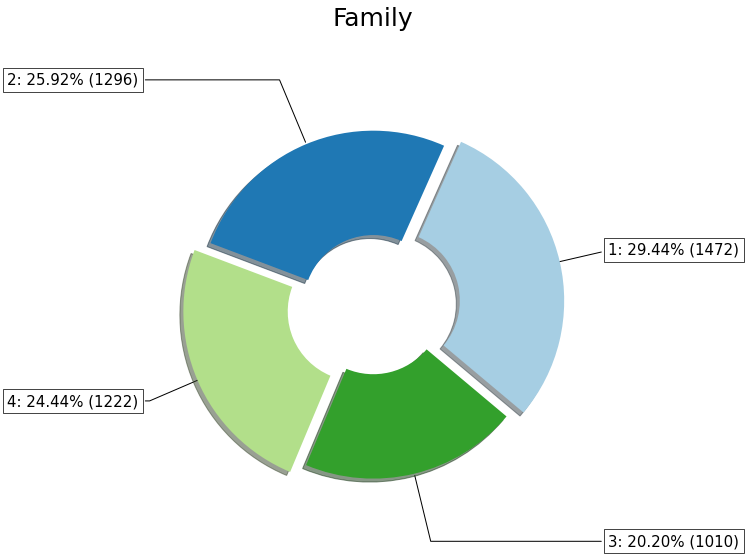

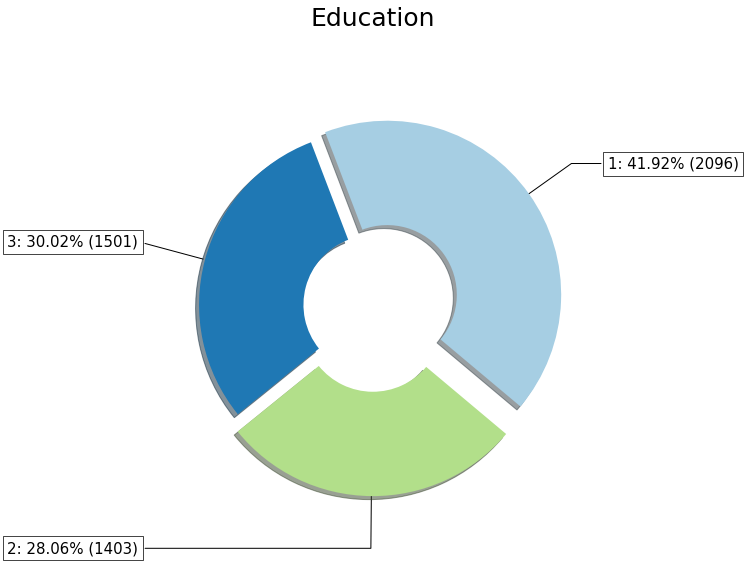

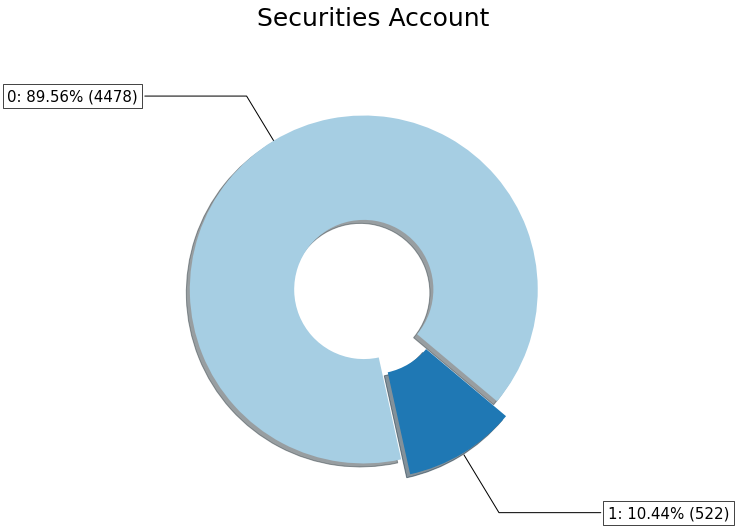

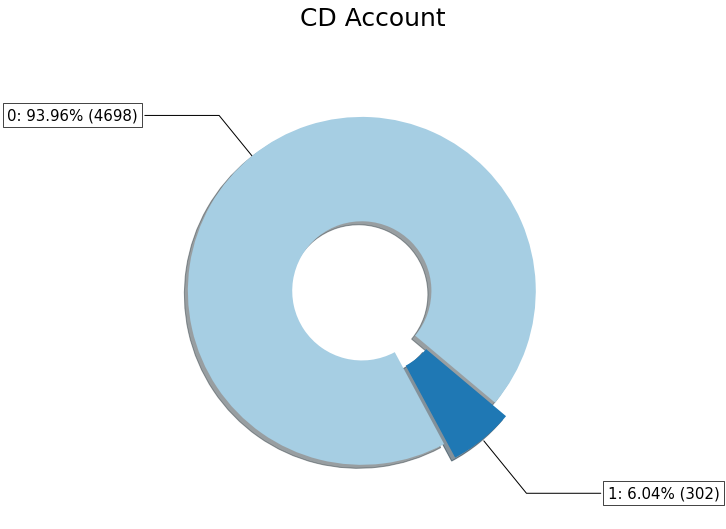

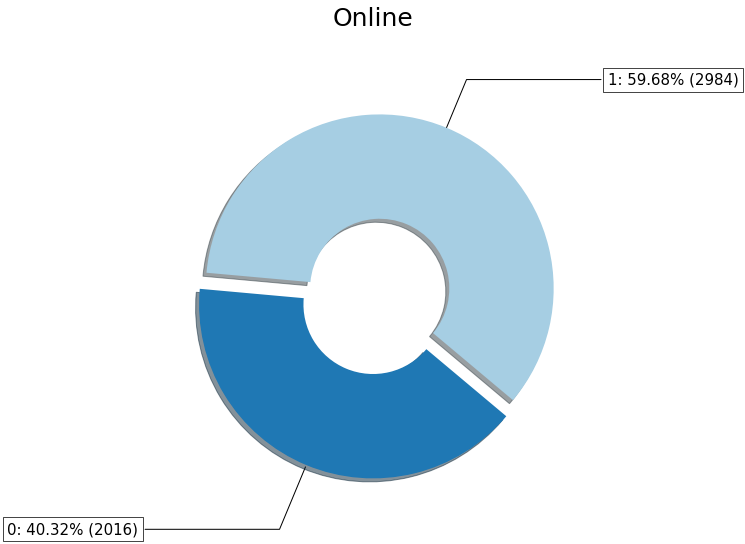

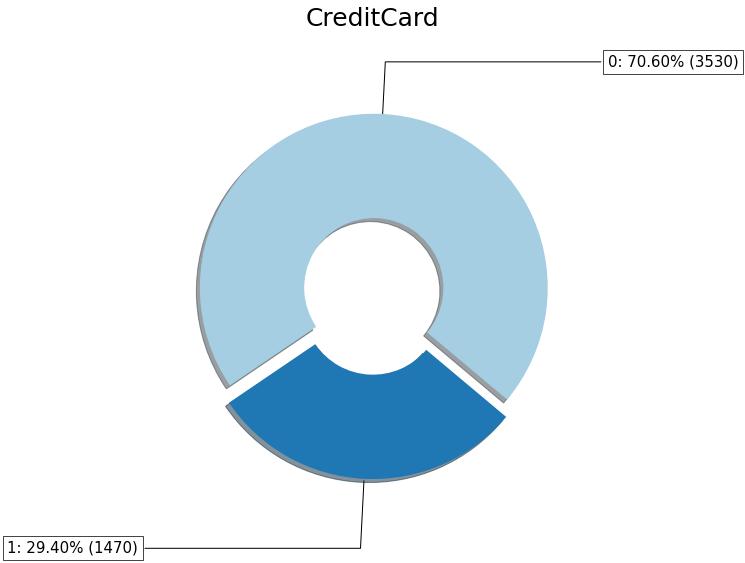

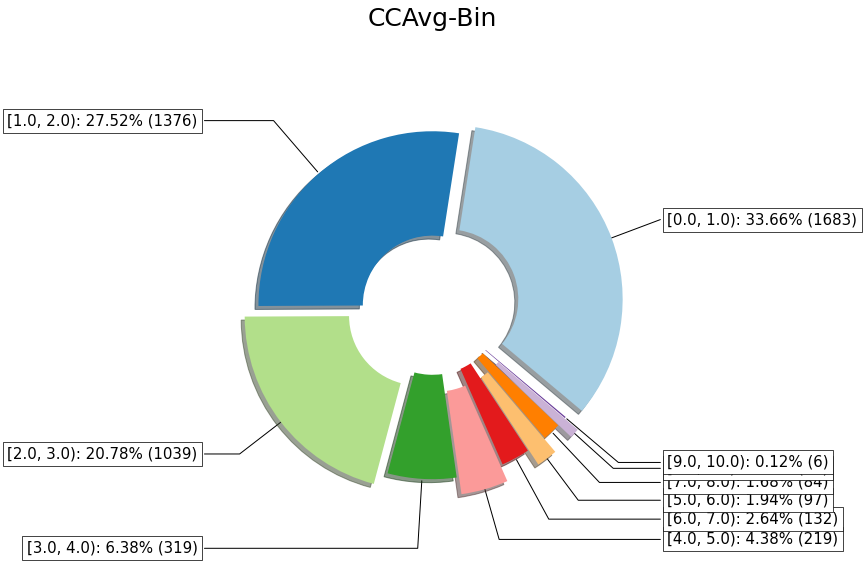

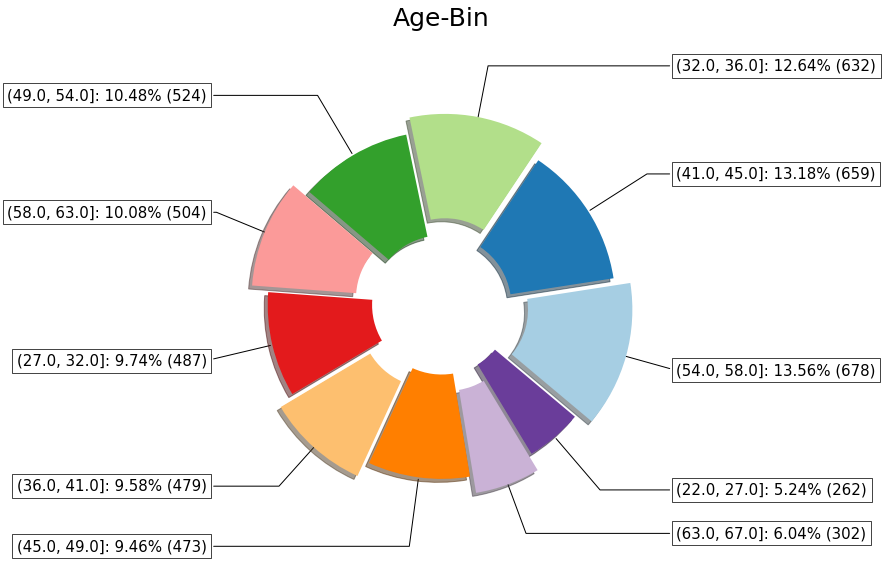

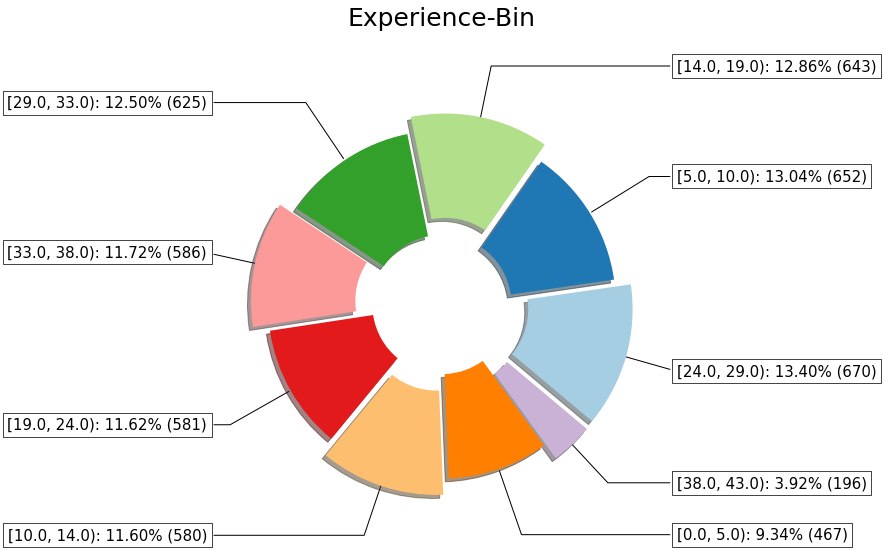

In [ ]:
if 'Personal Loan' not in cat_var_list:
    cat_var_list.append('Personal Loan')
else:
    pass

sncp_c3 = sns.color_palette("Paired", 20)

for cat_vars in cat_var_list:
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal")) 
    
    data = df[cat_vars].value_counts(normalize=True)
    label = data.index.values
    count = df[cat_vars].value_counts()
    explode = [0.1 if i%2 == 0 else 0.0 for i in range(cats_df1.loc[cat_vars]['N-Uniques'])  ]
    annot = [f'{p}: {(q*100):.2f}% ({r})' for p,q,r in zip(label,data,count)]

    
    # Courtesy: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
    wedges, texts = plt.pie(data,
                            shadow=True,
                            explode=explode,
                            textprops={'color':'black','fontsize':15},
                            wedgeprops=dict(width=0.6),
                            startangle=-40,
                           colors=sncp_c3);
    
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops={'arrowstyle':"-"},bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(annot[i], 
                    xy=(x, y), 
                    xytext=(1.35*np.sign(x), 1.4*y), 
                    horizontalalignment=horizontalalignment, 
                    fontsize=15,
                    **kw)
    ax.set_title(f"{cat_vars}\n\n",{'fontsize':25});
    plt.show()


#### Observations:
1. **ZIP code**:Almost 29% of the data is from ZIP code prefix 94 and almost 0.8% of it is from ZIP code prefix 96.
2. **Family**: The data seems to be fairly distributed across all family sizes.
3. **Education**: Almost 42% of the people are with education background 1 i.e Undergraduates.
4. **Securities Account**: Almost 90% of the people in the sample set do not have securities account.
5. **CD Account**: Almost 94% of the people in the sample set do not CD account with the bank.
6. **Online**: There is a fair mix of people with and without online access to their bank account.
7. **Credit Card**: Surprisingly, 71% of the people in the sample set do not have a credit card from Thera bank. 
8. **Average Number of Credit cards** : By large, people with 3-4 credit cards have opted for the personal loan and they are alsmost 6.4% of the overall dataset.
9. **Age**: By large, people in the age group of 32-36 years have opted for the personal loan and this age group is almost 13% of the total data set.
10. **Experience** : By large, people with an experience of 5-10 years have opted for the personal loan and they are 13% of the total dataset.
11. **Income** : By large, people with an income between 116-170K USD have opted for the personal loan and this group is almost 13% of the total data set.
12. **Mortgage** : By large, people with a mortgage of upto  159KUSD have opted for the personal loan and they are 85% of the total dataset.
13. **Personal Loan**: Almost 90% of the people in the sample set do not have a personal loan account. This is a target variable and may be a potential opportunity to promote the offer at lucrative rates or the dataset is imbalanced and needs to be balanced before modelling it. 

## Summary:
1. The Data set has almost 90% of samples without personal loan than those having one. This imbalance needs to be fixed using an approriate balancing method while modelling.
2. Age and Experience columns show highest correlation. Will need to drop of these columns while modelling.
3. Income,CCAvg,CD Account,Mortgage,Education and Family has statistically significant correlations with the target variable i.e Personal Loan.
4. We have bin'd all numberic variable into ranges to provide more insights.
5. The next part of this analysis is to mine for strategies that could yield a very high preferably 100% conversion ratio from a liability to an asset customer.